<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорты" data-toc-modified-id="Импорты-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорты</a></span></li><li><span><a href="#ПОСТРОИМ-ГРАФИК-РАСПРЕДЕЛЕНИЯС-СЛОВ-ПО-ЧАСТОТНОСТИ" data-toc-modified-id="ПОСТРОИМ-ГРАФИК-РАСПРЕДЕЛЕНИЯС-СЛОВ-ПО-ЧАСТОТНОСТИ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ПОСТРОИМ ГРАФИК РАСПРЕДЕЛЕНИЯС СЛОВ ПО ЧАСТОТНОСТИ</a></span><ul class="toc-item"><li><span><a href="#Отдельные-слова-(без-разделения-на-PoS)" data-toc-modified-id="Отдельные-слова-(без-разделения-на-PoS)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Отдельные слова (без разделения на PoS)</a></span></li><li><span><a href="#Биграммы" data-toc-modified-id="Биграммы-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Биграммы</a></span></li><li><span><a href="#Триграммы" data-toc-modified-id="Триграммы-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Триграммы</a></span></li><li><span><a href="#Четыреграммы" data-toc-modified-id="Четыреграммы-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Четыреграммы</a></span></li></ul></li><li><span><a href="#Entities-(географические-регионы)" data-toc-modified-id="Entities-(географические-регионы)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Entities (географические регионы)</a></span></li><li><span><a href="#Части-речи-(PoS)" data-toc-modified-id="Части-речи-(PoS)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Части речи (PoS)</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

#### Импорты

In [1]:
import spacy
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
import nltk
import numpy as np
from pymystem3 import Mystem
m = Mystem() 
import matplotlib.pyplot as plt
import docx
from tqdm import tqdm
import plotly.express as px
from spacy.lang.ru.examples import sentences 
nlp = spacy.load("ru_core_news_sm")
from spacy.lang.ru.examples import sentences 
from collections import Counter
import seaborn as sns

#### ПОСТРОИМ ГРАФИК РАСПРЕДЕЛЕНИЯС СЛОВ ПО ЧАСТОТНОСТИ

Загрузим заранее лемматизированный и очищенный корпус текстов

In [2]:
corpus_df=pd.read_csv("C:\\Users\\Admin\\Python+ DS Practice\\Яндекс Новости\\df_tihij_don.csv",encoding = 'cp1251',sep=',', error_bad_lines=False)
#В конце текста идут сноски, не будем их брать
corpus_df=corpus_df.loc[0:19719]
#Удалим пропуски
corpus_df=corpus_df.dropna()
len(corpus_df)

18982

In [3]:
#Переведем корпус в np.array
corpus=corpus_df.values.astype('U')
corpus=corpus.reshape(18982,)
corpus.shape

(18982,)

In [4]:
stop_words = set(stopwords.words('russian'))
print(len(stop_words))
#Добавим в стоп слова слова полученные эмпирическим путем
custom_stopwords = set(['это','весь','яя','ая','га','свой','спрашивать','становиться','отвечать','подходить','уходить','выходить','оставаться','разговор','ехать','приходить'])
print(len(custom_stopwords))
stop_words.update(custom_stopwords)
#Проверим результат обновления множества
print(len(stop_words))


151
16
167


In [5]:
#Добавим имена главныъ героев в словарь.
main_characters = set(['григорий','аксинья','пантелей','прокофиевич','иван','алексеевич','мирон','григорьевич','сергей','платонович','гришак','пантелевич','кошевой','мишка','мелехов','прохор','зыков','митька','коршунов','сашка','степан','астахов','наталья','петро','ильинична','дуняшка','бунчук','фомин','дарья','листницкий'])

In [6]:
#В данной работе главные герои нас не интересуют, уберем их
stop_words.update(main_characters)

In [7]:
#стоп слова из интернета вопрос спроный. Например убирая слово "ваше", мы теряем фразу "ваше благородие", т.е. часть авторского стиля. 
# В дальнейшем можно вернуться к этому моменту
stopwords_from_internet_1=set(["c","а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видел","видеть","вместе","вне","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","все еще","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делал","делать","делаю","дело","день","деньги","десятый","десять","для","до","довольно","долго","должен","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","иди","идти","из","или","им","имеет","имел","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могу","могут","мож","может","может быть","можно","можхо","мои","мой","мор","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ним","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","откуда","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подойди","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","путь","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","с кем","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твои","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотел бы","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я","являюсь"])
stop_words.update(stopwords_from_internet_1)

##### Отдельные слова (без разделения на PoS)

In [8]:
count_vect = CountVectorizer(stop_words=stop_words) 
bow = count_vect.fit_transform(corpus) 

print("Размер мешка без учёта стоп-слов:", bow.shape)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Размер мешка без учёта стоп-слов: (18982, 26062)


In [9]:
word_list=count_vect.get_feature_names() 
count_list = bow.toarray().sum(axis=0)

In [10]:
x = dict(zip(word_list,count_list))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series = pd.Series(g)

In [11]:
result_series[0:30]

казак        1823
хутор         828
конь          799
лошадь        670
дон           596
полк          579
красный       553
сотня         525
улыбаться     509
офицер        478
глядеть       475
старик        468
черный        439
станица       398
губа          362
баба          347
ветер         329
казачий       321
зараз         317
фронт         313
командир      308
возле         298
подымать      296
крикнуть      295
спина         292
палец         282
кровь         281
молодой       276
бог           272
двор          270
dtype: int64

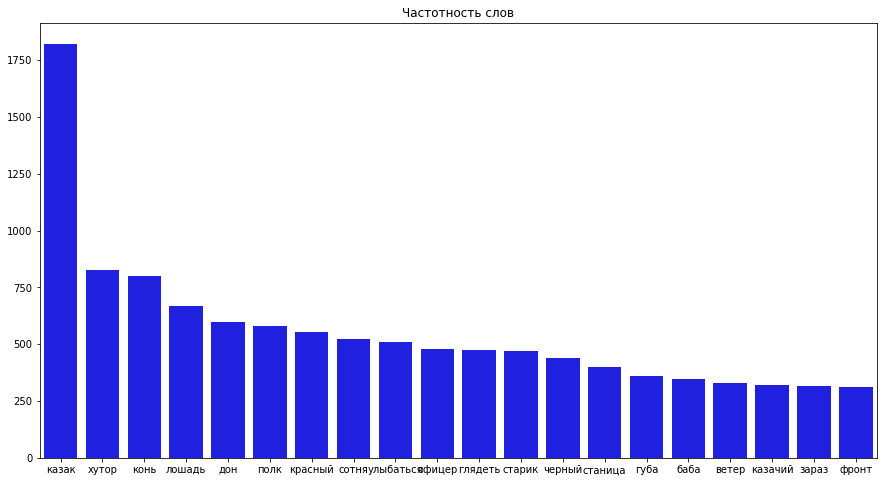

In [12]:
plt.figure(figsize=(15,8))
sns.barplot(x=result_series[0:20].index, y=result_series[0:20].values,color='blue')
plt.title("Частотность слов")
plt.show()

##### Биграммы

In [13]:
%%time
count_vect = CountVectorizer(ngram_range=(2, 2),stop_words=stop_words)
#n_gramm = count_vect.fit_transform(corpus)
bow = count_vect.fit_transform(corpus) 
print("Размер мешка без учёта стоп-слов:", bow.shape)
#print(word_list)
#print(count_list)
word_list=count_vect.get_feature_names() 
count_list = bow.toarray().sum(axis=0)
#print(word_list)
#print(count_list)
#print(dict(zip(word_list,count_list)))


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Размер мешка без учёта стоп-слов: (18982, 185263)
Wall time: 39.3 s


In [14]:
x = dict(zip(word_list,count_list))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
big={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series_bigram = pd.Series(big)
#result_series_bigram

In [15]:
result_series_bigram[0:40]

усть хоперский             51
красный армия              49
сукин сын                  49
командир полк              47
командир сотня             46
добровольческий армия      41
слава бог                  40
донской армия              35
войско донской             32
тихий дон                  32
военный революционный      30
го полк                    30
прижимать грудь            30
ради христос               30
усть медведицкий           30
революционный комитет      28
временный правительство    26
войсковой старшина         25
навес сарай                25
хутор татарский            25
казачий полк               24
начальник штаб             24
стискивать зуб             24
живой здоровый             23
молодой казак              23
конский копыто             22
походный порядок           22
штаб дивизия               22
взводный офицер            21
сердобский полк            21
войсковой правительство    20
господин офицер            20
мокрый пот                 20
правый фла

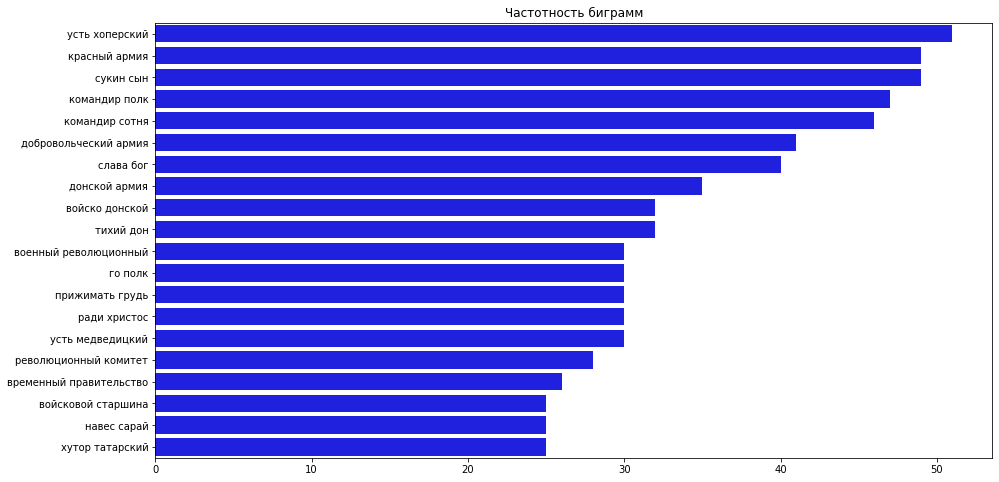

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series_bigram[0:20].index, x=result_series_bigram[0:20].values,color='blue')
plt.title("Частотность биграмм")
plt.show()

#####  Триграммы

In [17]:
count_vect = CountVectorizer(ngram_range=(3, 3),stop_words=stop_words) 
bow = count_vect.fit_transform(corpus) 
print("Размер мешка без учёта стоп-слов:", bow.shape)
word_list=count_vect.get_feature_names() 
count_list = bow.toarray().sum(axis=0)
#print(dict(zip(word_list,count_list)))
x = dict(zip(word_list,count_list))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
trig={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series_trig = pd.Series(trig)
#result_series_trig

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Размер мешка без учёта стоп-слов: (18982, 188925)


In [18]:
result_series_trig[0:15]

военный революционный комитет    28
всевеликий войско донской        12
военный полевой суд              11
лейб гвардия атаманский          11
гвардия атаманский полк           9
донской казачий полк              8
усть медведицкий округ            8
усть хоперский станица            8
безрукий алешка шамиль            7
казачий военный революционный     7
совет союз казачий                7
союз казачий войско               7
12 го полк                        6
44 го полк                        6
запах конский пот                 6
dtype: int64

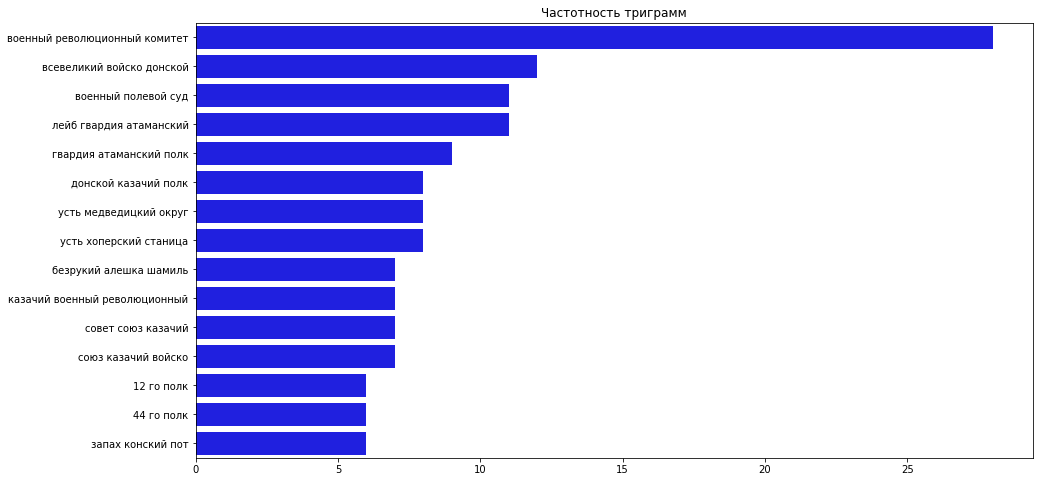

In [47]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series_trig[0:15].index, x=result_series_trig[0:15].values,color='blue')
plt.title("Частотность триграмм")
plt.show()

##### Четыреграммы

In [20]:
count_vect = CountVectorizer(ngram_range=(4, 4),stop_words=stop_words) 
bow = count_vect.fit_transform(corpus) 
print("Размер мешка без учёта стоп-слов:", bow.shape)
word_list=count_vect.get_feature_names() 
count_list = bow.toarray().sum(axis=0)
x = dict(zip(word_list,count_list))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
fourg={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series_fourg = pd.Series(fourg)
result_series_fourg

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Размер мешка без учёта стоп-слов: (18982, 175944)


лейб гвардия атаманский полк                9
казачий военный революционный комитет       7
совет союз казачий войско                   7
делегат 44 го полк                          4
командующий донской армия генерал           4
                                           ..
ящик патрон снаряд направлять               1
ящик покурить утыкаться сено                1
ящик пособлять лошадь подъем                1
ящик преимущественно казак бывший           1
ящик проезжать всматриваться привязывать    1
Length: 175944, dtype: int64

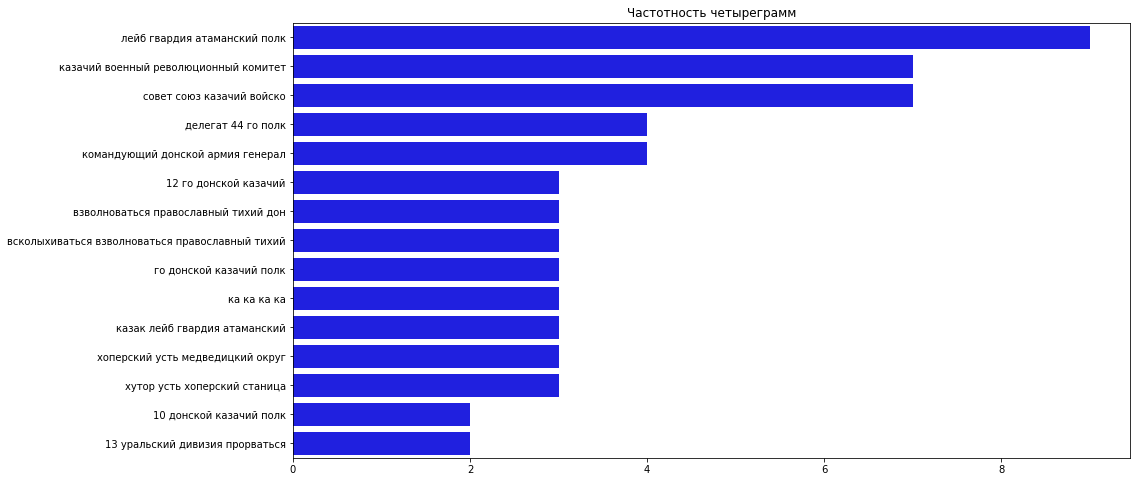

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(y=result_series_fourg[0:15].index, x=result_series_fourg[0:15].values,color='blue')
plt.title("Частотность четыреграмм")
plt.show()

#### Entities (географические регионы)

В данном случае придется использовать необработанный текст, так как сущности плохо находятся, если они не в верхнем регистре.

In [22]:
%%time
#doc = docx.Document("C:\\Users\\Admin\\OneDrive\\PET Projects (06-12)\\Тихий Дон\\Тихий_дон отрывок.docx")
doc = docx.Document("C:\\Users\\Admin\\OneDrive\\PET Projects (06-12)\\Тихий Дон\\Tihij_don_full.docx")

Wall time: 166 ms


In [23]:
all_paras = doc.paragraphs
len(all_paras)
fullText = []
for para in doc.paragraphs:
    fullText.append(para.text)
df1=pd.Series(fullText)

<b>Обработаем дефект импорта датасета</b>

In [24]:
df1=df1.replace('\xa0', ' ')

In [25]:
corpus = df1.values.astype('U')

In [26]:
#Функция для очистки текста
def clear_text(text):
    return " ".join(re.sub(r'[^a-zA-Zа-яА-я0-9 ]', ' ', text).split())  

#Функция для лемматизации токена
def lemmatize(text): 
    return "".join(m.lemmatize(text))

In [27]:
#Проверим работу библиотеки для поиска локаций'
text='Сергей приехал в Берлин, затем купил фруктовый сок. Татьяна позвонила Антону Павловичу.В Москве было холодно'
doc=nlp(text)
location=set()
for ent in doc.ents:
    if ent.label_ =='LOC':
        location.add(ent.lemma_.capitalize())
location

{'Берлин', 'Москва'}

In [28]:
%%time
location=list()
for i in tqdm(range(len(corpus))):
    doc=nlp(str(corpus[i]))
    for ent in doc.ents:
        if ent.label_ =='LOC':
            location.append((ent.lemma_.capitalize()))

100%|████████████████████████████████████████████████████████████████████████████| 20112/20112 [03:45<00:00, 89.29it/s]

Wall time: 3min 45s


In [29]:
for i in tqdm(range(len(location))):
    location[i]=(lemmatize(location[i])).capitalize()    


100%|██████████████████████████████████████████████████████████████████████████████| 3644/3644 [49:03<00:00,  1.24it/s]


In [30]:
for i in tqdm(range(len(location))):
    location[i]=(clear_text(location[i]))

100%|██████████████████████████████████████████████████████████████████████████| 3644/3644 [00:00<00:00, 456730.93it/s]


In [31]:
location_dict=Counter(location)
#{k: v for k, v in sorted(location_dict.items(), key=lambda item: item[1],reverse=True)}

Вешенский, Вешка - это станица Вешенская, основное место действия Романа. Удалим эти 2 элемента и заменим на 1.

In [32]:
vesh_count=location_dict['Вешенский']+location_dict['Вешка']
vesh_count
del location_dict['Вешенский']
del location_dict['Вешка']
location_dict.update({'Вешенская':vesh_count })

Удалим ошибочные имена из выдачи

In [33]:
items_to_delete=list(['Григорий','Ильич','Ильинична','Аксинья','Ставка','Дуняшка','Прохор','Наталья','Дарья','Аксиньин','Кошевой','Офицерский союз','Астахов','Пантелей прокофиевич'])
items_to_delete

for i in range(len(items_to_delete)):
    del location_dict[items_to_delete[i]]

location_dict={k: v for k, v in sorted(location_dict.items(), key=lambda item: item[1],reverse=True)}
location_series = pd.Series(location_dict)

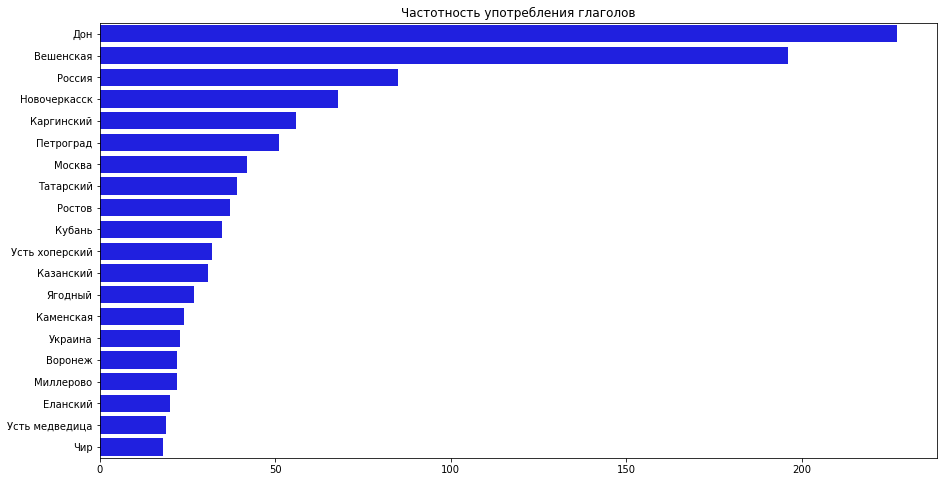

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(y=location_series[0:20].index, x=location_series[0:20].values,color='blue')
plt.title("Частотность употребления глаголов")
plt.show()


Как видим, основное действие связяно с рекой Дон, станицей Вешенская, станицами, хуторами и городами поблизости. Остальные крупные города были местомо действия исторических отсылок.
В принципе можно отфильтровать общие места вроде России, Дона, Кубани - что по сути означало наименование широких географических областей.

#### Части речи (PoS)

Посмотрим наиболее частые глаголы (кроме исключенных в стоп - словах)

In [35]:
#Используем эту ячейку чтобы не повторять лемматизацию постоянно
corpus_df=pd.read_csv("C:\\Users\\Admin\\Python+ DS Practice\\Яндекс Новости\\df_tihij_don.csv",encoding = 'cp1251',sep=',', error_bad_lines=False)
#В конце текста идут сноски, не будем их брать
corpus_df=corpus_df.loc[0:19719]
#Удалим пропуски
corpus_df=corpus_df.dropna()
len(corpus_df)
#Переведем корпус в np.array
corpus=corpus_df.values.astype('U')
corpus=corpus.reshape(18982,)
#corpus.shape
#Переведем корпус в np.array
corpus=corpus_df.values.astype('U')
corpus=corpus.reshape(18982,)
corpus.shape

(18982,)

In [36]:
stop_words = set(stopwords.words('russian'))
print(len(stop_words))
#Добавим в стоп слова слова полученные эмпирическим путем
custom_stopwords = set(['это','весь','яя','ая','га','свой','спрашивать','становиться','отвечать','подходить','уходить','выходить','оставаться','разговор','ехать','приходить'])
print(len(custom_stopwords))
stop_words.update(custom_stopwords)
#Проверим результат обновления множества
print(len(stop_words))

151
16
167


In [37]:
#Добавим имена главныъ героев в словарь.
main_characters = set(['григорий','аксинья','пантелей','прокофиевич','иван','алексеевич','мирон','григорьевич','сергей','платонович','гришак','пантелевич','кошевой','мишка','мелехов','прохор','зыков','митька','коршунов','сашка','степан','астахов','наталья','петро','ильинична','дуняшка','бунчук','фомин','дарья','листницкий'])

In [38]:
#В данной работе главные герои нас не интересуют, уберем их
stop_words.update(main_characters)

In [39]:
#стоп слова из интернета вопрос спроный. Например убирая слово "ваше", мы теряем фразу "ваше благородие", т.е. часть авторского стиля. 
# В дальнейшем можно вернуться к этому моменту
stopwords_from_internet_1=set(["c","а","алло","без","белый","близко","более","больше","большой","будем","будет","будете","будешь","будто","буду","будут","будь","бы","бывает","бывь","был","была","были","было","быть","в","важная","важное","важные","важный","вам","вами","вас","ваш","ваша","ваше","ваши","вверх","вдали","вдруг","ведь","везде","вернуться","весь","вечер","взгляд","взять","вид","видел","видеть","вместе","вне","вниз","внизу","во","вода","война","вокруг","вон","вообще","вопрос","восемнадцатый","восемнадцать","восемь","восьмой","вот","впрочем","времени","время","все","все еще","всегда","всего","всем","всеми","всему","всех","всею","всю","всюду","вся","всё","второй","вы","выйти","г","где","главный","глаз","говорил","говорит","говорить","год","года","году","голова","голос","город","да","давать","давно","даже","далекий","далеко","дальше","даром","дать","два","двадцатый","двадцать","две","двенадцатый","двенадцать","дверь","двух","девятнадцатый","девятнадцать","девятый","девять","действительно","дел","делал","делать","делаю","дело","день","деньги","десятый","десять","для","до","довольно","долго","должен","должно","должный","дом","дорога","друг","другая","другие","других","друго","другое","другой","думать","душа","е","его","ее","ей","ему","если","есть","еще","ещё","ею","её","ж","ждать","же","жена","женщина","жизнь","жить","за","занят","занята","занято","заняты","затем","зато","зачем","здесь","земля","знать","значит","значить","и","иди","идти","из","или","им","имеет","имел","именно","иметь","ими","имя","иногда","их","к","каждая","каждое","каждые","каждый","кажется","казаться","как","какая","какой","кем","книга","когда","кого","ком","комната","кому","конец","конечно","которая","которого","которой","которые","который","которых","кроме","кругом","кто","куда","лежать","лет","ли","лицо","лишь","лучше","любить","люди","м","маленький","мало","мать","машина","между","меля","менее","меньше","меня","место","миллионов","мимо","минута","мир","мира","мне","много","многочисленная","многочисленное","многочисленные","многочисленный","мной","мною","мог","могу","могут","мож","может","может быть","можно","можхо","мои","мой","мор","мочь","моя","моё","мы","на","наверху","над","надо","назад","наиболее","найти","наконец","нам","нами","народ","нас","начала","начать","наш","наша","наше","наши","не","него","недавно","недалеко","нее","ней","некоторый","нельзя","нем","немного","нему","непрерывно","нередко","несколько","нет","нею","неё","ни","нибудь","ниже","низко","никакой","никогда","никто","никуда","ним","ними","них","ничего","ничто","но","новый","нога","ночь","ну","нужно","нужный","нх","о","об","оба","обычно","один","одиннадцатый","одиннадцать","однажды","однако","одного","одной","оказаться","окно","около","он","она","они","оно","опять","особенно","остаться","от","ответить","отец","откуда","отовсюду","отсюда","очень","первый","перед","писать","плечо","по","под","подойди","подумать","пожалуйста","позже","пойти","пока","пол","получить","помнить","понимать","понять","пор","пора","после","последний","посмотреть","посреди","потом","потому","почему","почти","правда","прекрасно","при","про","просто","против","процентов","путь","пятнадцатый","пятнадцать","пятый","пять","работа","работать","раз","разве","рано","раньше","ребенок","решить","россия","рука","русский","ряд","рядом","с","с кем","сам","сама","сами","самим","самими","самих","само","самого","самой","самом","самому","саму","самый","свет","свое","своего","своей","свои","своих","свой","свою","сделать","сеаой","себе","себя","сегодня","седьмой","сейчас","семнадцатый","семнадцать","семь","сидеть","сила","сих","сказал","сказала","сказать","сколько","слишком","слово","случай","смотреть","сначала","снова","со","собой","собою","советский","совсем","спасибо","спросить","сразу","стал","старый","стать","стол","сторона","стоять","страна","суть","считать","т","та","так","такая","также","таки","такие","такое","такой","там","твои","твой","твоя","твоё","те","тебе","тебя","тем","теми","теперь","тех","то","тобой","тобою","товарищ","тогда","того","тоже","только","том","тому","тот","тою","третий","три","тринадцатый","тринадцать","ту","туда","тут","ты","тысяч","у","увидеть","уж","уже","улица","уметь","утро","хороший","хорошо","хотел бы","хотеть","хоть","хотя","хочешь","час","часто","часть","чаще","чего","человек","чем","чему","через","четвертый","четыре","четырнадцатый","четырнадцать","что","чтоб","чтобы","чуть","шестнадцатый","шестнадцать","шестой","шесть","эта","эти","этим","этими","этих","это","этого","этой","этом","этому","этот","эту","я","являюсь"])
stop_words.update(stopwords_from_internet_1)

In [40]:
count_vect = CountVectorizer(stop_words=stop_words) 
bow = count_vect.fit_transform(corpus) 

print("Размер мешка без учёта стоп-слов:", bow.shape)
#count_vect.get_feature_names() 
word_list=count_vect.get_feature_names() 
count_list = bow.toarray().sum(axis=0)
x = dict(zip(word_list,count_list))
{k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
g={k: v for k, v in sorted(x.items(), key=lambda item: item[1],reverse=True)}
result_series = pd.Series(g)
dict_for_test=result_series.to_dict()

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Размер мешка без учёта стоп-слов: (18982, 26062)


In [41]:
verb_series=dict()
for i in tqdm(dict_for_test.keys()):
    doc=nlp(i)
    for token in doc:
        if token.pos_ =='VERB':
            verb_series.update({i:dict_for_test[i]})

100%|███████████████████████████████████████████████████████████████████████████| 26062/26062 [01:33<00:00, 279.47it/s]


In [42]:
verb_series
#Сортируем по убыванию частотности
verb_dict={k: v for k, v in sorted(verb_series.items(), key=lambda item: item[1],reverse=True)}
verb_pd_series = pd.Series(verb_dict)


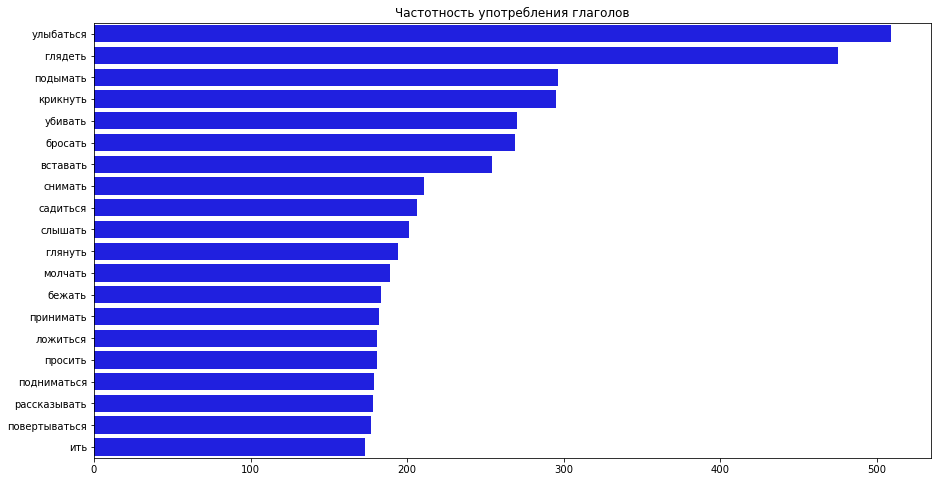

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(y=verb_pd_series[0:20].index, x=verb_pd_series[0:20].values,color='blue')
plt.title("Частотность употребления глаголов")
plt.show()


In [44]:
#Можно обновить список стоп-слов - приезжать, поехать, входить,спать,начинать, нету.
#Можно оставить пока так до сравнения с другими книгами

In [53]:
verbs_to_delete=list(['приезжать','поехать','входить','спать','начинать','нету','ходить','проходить'])
verbs_to_delete

for i in range(len(verbs_to_delete)):
    try:
        del verb_dict[verbs_to_delete[i]] 
    except:
        pass

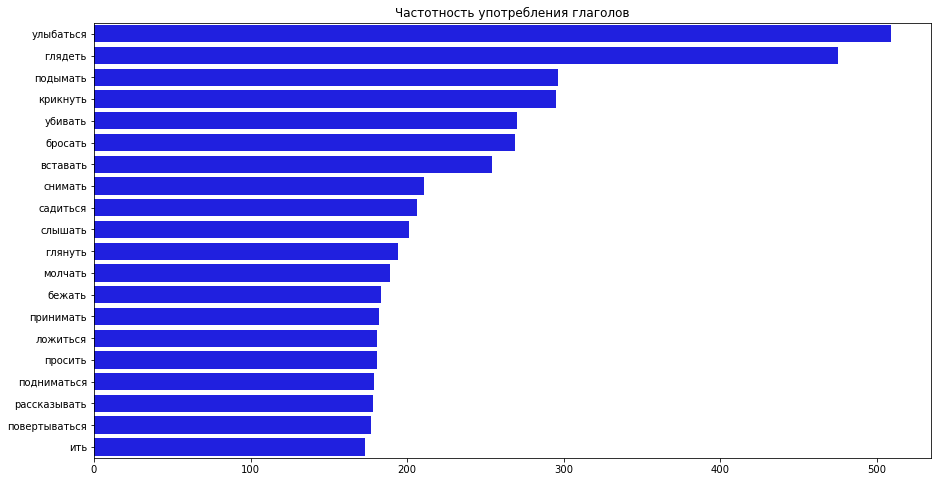

In [54]:
plt.figure(figsize=(15,8))
sns.barplot(y=verb_pd_series[0:20].index, x=verb_pd_series[0:20].values,color='blue')
plt.title("Частотность употребления глаголов")
plt.show()

#### Выводы

1.В данной работе были исследованы инструменты для выполнения актуальных задач для NLP - POS-тэггинг, NER.<br>
2.Требуется объемная ручная обработка, так как библиотека spacy не всегда верно распознает географические точки, вставляя в них имена героев. Поэтому без знания книги, текст не обработать автоматически. С другой стороны, книге около 100 лет, и то что добавляются лишние сущности лучше чем если бы они пропускались вовсе.<br>
3.В дальнейшем можно сравнить данный анализ с анализом по книге Шолохова "Донские рассказы" и найти схожести в описании, чтобы ответить на вопрос об авторстве книг.